<a href="https://colab.research.google.com/github/mrrajatgarg/kaggle/blob/master/dogsvscatsCNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading of dataset from Kaggle

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrrajatgarg","key":"ae5a419aa72b781b3ca5459616930b23"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Feb  6 16:39 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 68.1MB/s]
 95% 257M/271M [00:05<00:00, 53.4MB/s]
100% 271M/271M [00:05<00:00, 49.7MB/s]
 99% 537M/543M [00:11<00:00, 47.2MB/s]
100% 543M/543M [00:11<00:00, 47.9MB/s]


In [6]:
!ls

0  8			  dataset_clip_id_melgram	 mp3.zip.001
1  9			  dataset_clip_id_melgram_1.zip  mp3.zip.002
2  a			  dataset_clip_id_melgram_22	 mp3.zip.003
3  adc.json		  dataset_clip_id_mp3		 sample_data
4  annotations_final.csv  e				 sampleSubmission.csv
5  b			  f				 test1.zip
6  c			  kaggle.json			 train.zip
7  d			  mp3_all.zip


In [7]:
from zipfile import ZipFile

file_name = "train.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [8]:
file_name = "test1.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [9]:
!ls

0  adc.json			  kaggle.json
1  annotations_final.csv	  mp3_all.zip
2  b				  mp3.zip.001
3  c				  mp3.zip.002
4  d				  mp3.zip.003
5  dataset_clip_id_melgram	  sample_data
6  dataset_clip_id_melgram_1.zip  sampleSubmission.csv
7  dataset_clip_id_melgram_22	  test1
8  dataset_clip_id_mp3		  test1.zip
9  e				  train
a  f				  train.zip


# Importing Libraries

In [10]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

!pip install np_utils

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
!pip install np_utils

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [0]:
from sklearn.utils import shuffle

In [16]:
!pip install sklearn
import sklearn
from sklearn.model_selection import train_test_split

# Converting image's to vectors

In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test1/'

In [0]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [0]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [24]:
X_train, y_train = prep_data(train_images)
X_test, y_test = prep_data(test_images)

X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [25]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (25000, 64, 64, 3)
Test shape: (12500, 64, 64, 3)


In [0]:
X, y = shuffle(X_train, y_train)

In [28]:
X.shape

(25000, 64, 64, 3)

In [29]:
y.shape

(25000, 1)

# Splitting of dataset into train (60%), validation (20%) and test (20%)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print("Train shape: {}".format(X_train.shape))
print("Train label shape: {}".format(y_train.shape))
print("Validation shape: {}".format(X_val.shape))
print("Validation label shape: {}".format(y_val.shape))

Train shape: (20000, 64, 64, 3)
Train label shape: (20000, 1)
Validation shape: (5000, 64, 64, 3)
Validation label shape: (5000, 1)


# Converting to one-hot vector representation

In [33]:
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(20000, 2)
2
(5000, 2)


# Visualizing the dataset

In [0]:
classes = {0: 'cats',
          1: 'dogs'}

In [0]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

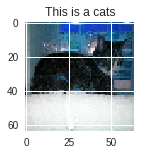

In [36]:
show_images(X_train, y_train, 0)

In [0]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255

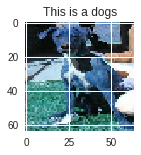

In [38]:
show_images(X_train_norm, y_train, 5)

# Final Choosen Model Architecture and Training of Model

For the details about how this architecture is choosen, scroll down to the last section on "How to choose the right model architecture iteratively?"

In [0]:
model9 = Sequential()

model9.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))

model9.add(Conv2D(64, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(128, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(256, (3,3), activation='relu'))
model9.add(MaxPooling2D(pool_size = (2,2)))
model9.add(Dropout(0.4))

model9.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model9.add(Flatten())
model9.add(Dropout(0.4))

model9.add(Dense(units=120, activation='relu'))
model9.add(Dense(units=2, activation='sigmoid'))

In [40]:
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
__________

In [41]:
model9.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=50, batch_size = 64)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 18s 897us/step - loss: 0.6680 - acc: 0.5837 - val_loss: 0.6425 - val_acc: 0.6152
Epoch 2/50
20000/20000 [==============================] - 11s 554us/step - loss: 0.5883 - acc: 0.6884 - val_loss: 0.5301 - val_acc: 0.7230
Epoch 3/50
20000/20000 [==============================] - 11s 560us/step - loss: 0.5216 - acc: 0.7439 - val_loss: 0.4747 - val_acc: 0.7870
Epoch 4/50
20000/20000 [==============================] - 11s 551us/step - loss: 0.4715 - acc: 0.7761 - val_loss: 0.4160 - val_acc: 0.8134
Epoch 5/50
20000/20000 [==============================] - 11s 557us/step - loss: 0.4358 - acc: 0.8019 - val_loss: 0.3841 - val_acc: 0.8312
Epoch 6/50
20000/20000 [==============================] - 11s 556us/step - loss: 0.4093 - acc: 0.8144 - val_loss: 0.3751 - val_acc: 0.8316
Epoch 7/50
20000/20000 [==============================] - 11s 554us/s

# Making Predictions using the model on Training and Test data

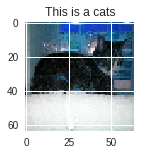

Our Model Prediction: [0]


In [46]:
image = X_train[0]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,0)

print("Our Model Prediction: {}".format(test_pred))

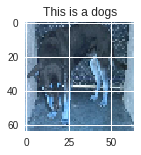

Our Model Prediction: [1]


In [47]:
image = X_train[100]
test_pred = model9.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,100)

print("Our Model Prediction: {}".format(test_pred))

In [0]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,64,64,3)
  image_class = classes[model.predict_classes(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

In [50]:
X_test, test_idx = prep_data(test_images)

X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


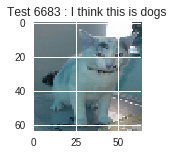

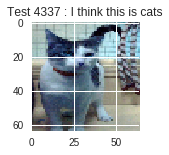

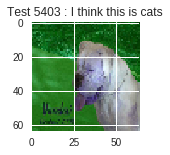

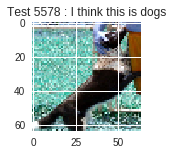

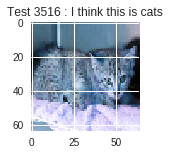

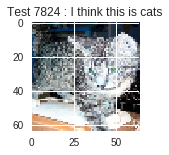

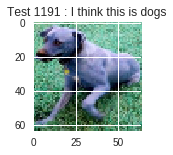

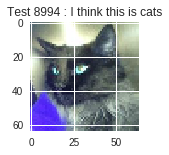

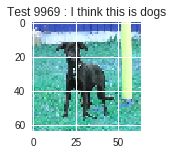

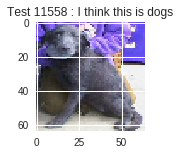

In [54]:
X_test_lr, test_idx = X_test, test_idx

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, model9)

# How to choose the right model architecture iteratively?

Choosing the right architecture and the correct set of hyperparameter is an art of Deep Learning that's very important to master for any data scientist.

Here, I give you a quick guide on how you can choose the right architecture for your particular task and the correct set of hyperparameters iteratively.

**Model 1**

1. Build a simple and rought model quickly. It will not perform good but it will give you a good insight as to where you can improve in your architecture and set of hyperparameters.

In [0]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.6))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))

model1.add(Flatten())
model1.add(Dropout(0.6))

model1.add(Dense(units=120, activation='relu'))
model1.add(Dense(units=2, activation='sigmoid'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 6, 6, 64)          0         
__________

In [0]:
model1.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 8s 385us/step - loss: 0.6659 - acc: 0.5793 - val_loss: 0.6241 - val_acc: 0.6558
Epoch 2/20
20000/20000 [==============================] - 7s 333us/step - loss: 0.5993 - acc: 0.6787 - val_loss: 0.5478 - val_acc: 0.7296
Epoch 3/20
20000/20000 [==============================] - 7s 334us/step - loss: 0.5474 - acc: 0.7221 - val_loss: 0.5477 - val_acc: 0.7112
Epoch 4/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.5109 - acc: 0.7496 - val_loss: 0.4578 - val_acc: 0.7902
Epoch 5/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.4796 - acc: 0.7679 - val_loss: 0.4202 - val_acc: 0.8124
Epoch 6/20
20000/20000 [==============================] - 7s 334us/step - loss: 0.4615 - acc: 0.7809 - val_loss: 0.4205 - val_acc: 0.8120
Epoch 7/20
20000/20000 [==============================] - 7s 335us/step - loss: 0.4461 - acc: 0.7928 - val_loss: 0.4210 - v

As you can see our model is showing a training accruacy of 84.84 % on training data that can be increased. However, our model right now has only 96650 trainable parameters. We can make our model more deeper to make our training accuracy even better.

**Model 2**

In [0]:
model2 = Sequential()

model2.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
#model2.add(Dropout(0.6))

model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(256, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Flatten())
#model2.add(Dropout(0.6))

model2.add(Dense(units=120, activation='relu'))
model2.add(Dense(units=2, activation='sigmoid'))

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 256)         295168    
__________

In [0]:
model2.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 10s 502us/step - loss: 0.6396 - acc: 0.6042 - val_loss: 0.5561 - val_acc: 0.7144
Epoch 2/20
20000/20000 [==============================] - 9s 451us/step - loss: 0.5266 - acc: 0.7379 - val_loss: 0.4913 - val_acc: 0.7644
Epoch 3/20
20000/20000 [==============================] - 9s 450us/step - loss: 0.4421 - acc: 0.7939 - val_loss: 0.4133 - val_acc: 0.8108
Epoch 4/20
20000/20000 [==============================] - 9s 450us/step - loss: 0.3797 - acc: 0.8280 - val_loss: 0.3899 - val_acc: 0.8262
Epoch 5/20
20000/20000 [==============================] - 9s 451us/step - loss: 0.3198 - acc: 0.8607 - val_loss: 0.3592 - val_acc: 0.8414
Epoch 6/20
20000/20000 [==============================] - 9s 454us/step - loss: 0.2817 - acc: 0.8755 - val_loss: 0.3736 - val_acc: 0.8360
Epoch 7/20
20000/20000 [==============================] - 9s 456us/step - loss: 0.2263 - acc: 0.9041 - val_loss: 0.4104 - 

We can clearly see that making our model deeper do help with the training accuracy as now our Training Accuracy has increased to 98.88% but our validation accuracy is only 84.56%. This means our model is overfitting. We can add regularization techniques like dropout to improve our validation set performance and prevent overfitting of our model.

**Model 3**

In [0]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Conv2D(256, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))

model3.add(Flatten())
model3.add(Dropout(0.3))

model3.add(Dense(units=120, activation='relu'))
model3.add(Dense(units=2, activation='sigmoid'))

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 6, 6, 128)         0         
__________

In [0]:
model3.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=20, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 13s 653us/step - loss: 0.6659 - acc: 0.5752 - val_loss: 0.6242 - val_acc: 0.6496
Epoch 2/20
20000/20000 [==============================] - 12s 583us/step - loss: 0.5664 - acc: 0.7017 - val_loss: 0.5346 - val_acc: 0.7270
Epoch 3/20
20000/20000 [==============================] - 12s 584us/step - loss: 0.4990 - acc: 0.7557 - val_loss: 0.4755 - val_acc: 0.7682
Epoch 4/20
20000/20000 [==============================] - 12s 583us/step - loss: 0.4461 - acc: 0.7919 - val_loss: 0.4160 - val_acc: 0.8120
Epoch 5/20
20000/20000 [==============================] - 12s 581us/step - loss: 0.4024 - acc: 0.8140 - val_loss: 0.4067 - val_acc: 0.8188
Epoch 6/20
20000/20000 [==============================] - 11s 572us/step - loss: 0.3679 - acc: 0.8360 - val_loss: 0.3570 - val_acc: 0.8444
Epoch 7/20
20000/20000 [==============================] - 11s 565us/step - loss: 0.3368 - acc: 0.8482 - val_loss: 0.3

After applying Dropout as our regularization technique, the amount of overfitting has certainly reduced but our model training accuracy has considerably reduced to 94.40%. This means that if we further increase the dropout for further reducing the overfitting, our training accuracy will decrease drastically. So, we need to increase the trainable parameters more. That means, either we can make our network more deep or remove the MaxPooling2D layer just before the flatten(). We take the 2nd approach. But both approaches can be checked. Moreover, we add the dropout as well so that our model do not overfit.

Model 4

In [0]:
model4 = Sequential()

model4.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Conv2D(64, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(128, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(256, (3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size = (2,2)))
model4.add(Dropout(0.4))

model4.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

model4.add(Flatten())
model4.add(Dropout(0.4))

model4.add(Dense(units=120, activation='relu'))
model4.add(Dense(units=2, activation='sigmoid'))

This model gives the best accuracy. So we trained it for 50 epochs and the result for which is shown in the "Final Choosen Model Architecture and Training of Model" section.

You can further twerk the hyperparameter and the model architecture to get even better accuracy. However, I will leave you here.

Wish You A Happy Exploring!!